In [2]:
import csv
import pandas

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scikitplot
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pickle

In [35]:
def getData():
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    first = True

    for line in open(file_name):
        if first:
            first = False
        else:
            row = line.split(',')
            if int(row[0]) == 3 or int(row[0]) == 6 or int(row[0]) == 4:
                if row[2] == "Training\n":
                    Y_train.append(int(row[0]))
                    X_train.append([int(p) for p in row[1].split()])
                else:
                    Y_test.append(int(row[0]))
                    X_test.append([int(p) for p in row[1].split()])

    X_train = np.asarray(X_train, np.float32)
    X_test = np.asarray(X_test, np.float32)
    X_train = X_train / 255
    X_test = X_test / 255
    """
    X1 = []
    for idx in range(len(X_train)):
        X1.append(tf.reshape(tf.convert_to_tensor(X_train[idx], np.float32), [48,48]))
    X_train = X1
    X1 = []
    for idx in range(len(X_test)):
        X1.append(tf.reshape(tf.convert_to_tensor(X_test[idx], np.float32), [48,48]))
    X_test = X1
    """
    
    # Y_train = tf.convert_to_tensor(Y_train)
    # Y_test = tf.convert_to_tensor(Y_test)

    return X_train, Y_train, X_test, Y_test

In [36]:
file_name = './../Resources/dataset/fer2013.csv'
X_train, Y_train, X_test, Y_test = getData()

In [38]:
clf = svm.SVC(decision_function_shape = 'ovo', cache_size=2000, kernel = 'rbf', C = 10, gamma = 0.0001)
clf.fit(X_train, Y_train)
with open('happy_sad_neutral_rbf_C10_gamma1e-4', 'wb') as fid:
    pickle.dump(clf, fid)

In [39]:
def calculateAccuracy(X, Y, classifier):
    l = len(X)
    i = 0
    for idx in range(l):
        prediction = classifier.predict([X[idx]])
        if prediction == Y[idx]:
            i += 1
    return i / l


In [40]:
calculateAccuracy(X_test,Y_test, clf)

0.5672308415608839

In [41]:
y_predicted = clf.predict(X_test)

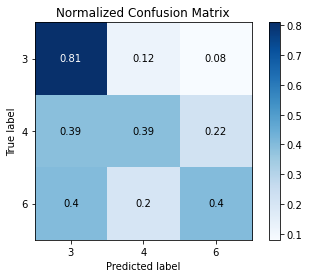

In [43]:
scikitplot.metrics.plot_confusion_matrix(Y_test, y_predicted, normalize=True)
plt.savefig('happy_sad_neutral_rbf_C10_gamma1e-4_confusion_matrix.png')

In [37]:
# Set the Parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf = GridSearchCV(svm.SVC(cache_size = 2000), tuned_parameters, scoring='%s_macro' % score
                      )
    clf.fit(X_train[1:2000], Y_train[1:2000])
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on first 2000 entries of development set.")
    print("The scores are computed on the first 200 entries of evaluation set.")
    print()
    Y_true, Y_pred = Y_test[1:200], clf.predict(X_test[1:200])
    print(classification_report(Y_true, Y_pred))
    print()



# Tuning hyper-parameters for precision



/Users/maxlewerenz/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maxlewerenz/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maxlewerenz/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maxlewere

Best parameters set found on development set:

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:

0.484 (+/-0.086) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.140 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.504 (+/-0.044) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.511 (+/-0.097) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.483 (+/-0.054) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.495 (+/-0.068) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.474 (+/-0.043) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.473 (+/-0.049) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.439 (+/-0.031) for {'C': 1, 'kernel': 'linear'}
0.439 (+/-0.036) for {'C': 10, 'kernel': 'linear'}
0.428 (+/-0.031) for {'C': 100, 'kernel': 'linear'}
0.428 (+/-0.031) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on first 2000 entries of development set.
The scores are computed on the first 200 entries of 

In [21]:
calculateAccuracy(X_test,Y_test, clf)

0.7159960093116062

In [15]:
def showImage(img):
    img = np.reshape(img, (48, 48))
    plt.imshow(img)
    plt.show()


100


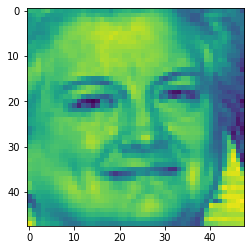

101


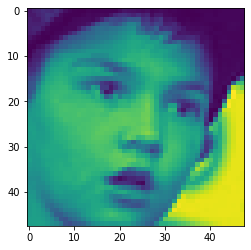

102


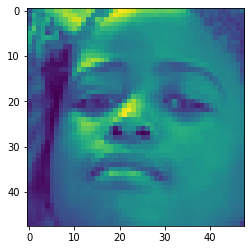

103


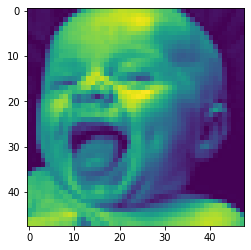

104


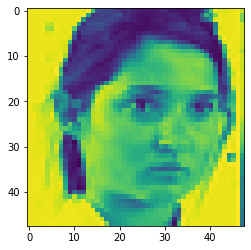

105


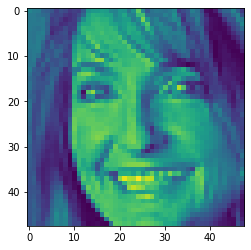

106


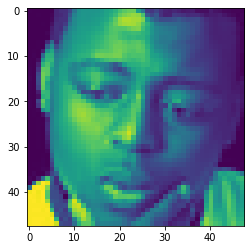

107


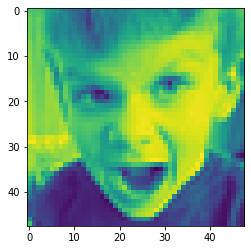

108


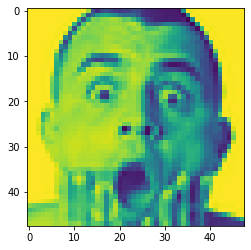

109


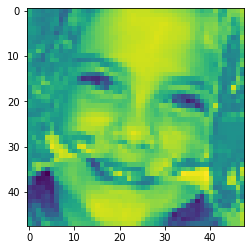

In [21]:
for i in range(100,110):
    print(i)
    showImage((X_train[i]))

In [28]:
len(X_train)

28709